In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 선수데이터
a=pd.read_csv('./total_players.csv')
a.head()

,age,cap,goal,height,name,nation,salary
0,31,26,0,184,AliKhaseifA.,U.A.E,270
1,29,22,0,176,KhalidEisaKhalid,U.A.E,270
2,22,0,0,185,MohamedAl,U.A.E,225
3,30,24,0,181,FaresJumaFares,U.A.E,495
4,29,41,0,183,MohamedAhmadMohamed,U.A.E,360


In [3]:
# 아시안컵 19년도
asian = pd.read_csv('./data/AsianCup19.csv')
asian.head()

,경기날짜,팀,팀1점수,팀2점수,승패,점수차
0,01.02. 23:00,일본,1,3,0,-2
1,29.01. 23:00,카타르,4,0,2,4
2,28.01. 23:00,이란,0,3,0,-3
3,26.01. 01:00,아랍에미리트,1,0,2,1
4,25.01. 22:00,대한민국,0,1,0,-1


In [4]:
len(asian)

102

In [5]:
asian['팀'].unique()

array(['일본', '카타르 ', '이란', '아랍에미리트 ', '대한민국', '중국', '베트남', '대한민국 ', '호주 ',
       '일본 ', '이란 ', '태국', '요르단', '호주', '이라크', '바레인', '키르기스스탄', '우즈베키스탄',
       '사우디아라비아', '오만', '중국 ', '베트남 ', '레바논', '팔레스타인', '아랍에미리트', '인도',
       '투르크메니스탄', '북한 ', '예멘', '필리핀', '카타르', '우즈베키스탄 ', '시리아', '북한',
       '팔레스타인 '], dtype=object)

In [6]:
# asian 테이블에 국가 뒤에 공백있는거 제거
names = []
for i in asian['팀']:
    names.append(i.strip())

print(names)

['일본', '카타르', '이란', '아랍에미리트', '대한민국', '중국', '베트남', '카타르', '대한민국', '아랍에미리트', '호주', '일본', '이란', '태국', '요르단', '카타르', '아랍에미리트', '일본', '호주', '카타르', '이란', '일본', '이라크', '바레인', '키르기스스탄', '우즈베키스탄', '사우디아라비아', '오만', '중국', '베트남', '레바논', '사우디아라비아', '오만', '일본', '베트남', '이란', '대한민국', '키르기스스탄', '팔레스타인', '호주', '아랍에미리트', '인도', '투르크메니스탄', '오만', '북한', '레바논', '예멘', '베트남', '키르기스스탄', '필리핀', '팔레스타인', '인도', '요르단', '바레인', '카타르', '우즈베키스탄', '일본', '사우디아라비아', '이라크', '이란', '대한민국', '중국', '시리아', '태국', '호주', '아랍에미리트', '북한', '카타르', '투르크메니스탄', '우즈베키스탄', '예멘', '이라크', '중국', '필리핀', '요르단', '시리아', '태국', '바레인', '우즈베키스탄', '일본', '카타르', '사우디아라비아', '이라크', '이란', '대한민국', '중국', '호주', '아랍에미리트', '시리아', '태국', '레바논', '오만', '투르크메니스탄', '북한', '베트남', '예멘', '필리핀', '키르기스스탄', '팔레스타인', '인도', '요르단', '바레인']


In [7]:
asian['팀'] = names

In [8]:
# 피파랭킹 19년도
fifarank = pd.read_csv('./data/FIFARank.csv')
fifarank = fifarank.drop(columns = ['점수'])
fifarank.head()

,랭킹,국가
0,1,벨기에
1,2,프랑스
2,3,브라질
3,4,크로아티아
4,5,잉글랜드


In [9]:
fifarank['국가'].unique()

array(['벨기에', '프랑스', '브라질', '크로아티아', '잉글랜드', '포르투갈', '우루과이', '스위스', '스페인',
       '덴마크', '아르헨티나', '콜롬비아', '칠레', '스웨덴', '네덜란드', '독일', '멕시코', '이탈리아',
       '웨일스', '폴란드', '페루', '오스트리아', '세네갈', '루마니아', '미국', '튀니지', '슬로바키아',
       '우크라이나', '세르비아', '이란', '베네수엘라', '파라과이', '아일랜드', '보스니아 헤르체고비나',
       '북아일랜드', '코스타리카', '아이슬란드', '스코틀랜드', '터키', '모로코', '호주', '체코', '그리스',
       '나이지리아', '몬테네그로', '불가리아', '노르웨이', '러시아', '콩고민주공화국', '일본', '헝가리',
       '가나', '한국', '자메이카', '카메룬', '이집트', '에콰도르', '핀란드', '볼리비아', '알바니아',
       '부르키나파소', '슬로베니아', '온두라스', '말리', '코트디부아르', '기니', '알제리', '마케도니아',
       '사우디아라비아', '엘살바도르', '파나마', '남아공', '카보베르데', '시리아', '우간다', '벨라루스',
       '중국', '캐나다', '아랍에미리트', '퀴라소', '레바논', '오만', '잠비아', '콩고공화국', '가봉',
       '룩셈부르크', '키프로스', '이라크', '조지아', '이스라엘', '키르기스스탄', '트리니다드 토바고',
       '카타르', '베냉', '우즈베키스탄', '에스토니아', '인도', '페로 제도', '팔레스타인', '베트남',
       '모리타니', '아르메니아', '아이티', '리비아', '케냐', '마다가스카르', '아제르바이잔', '니제르',
       '북한', '요르단', '나미비아', '중앙아프리카', '바레인', '짐바브웨', '시에라리온', '필

In [10]:
# 한국이라 되어있기 때문에 아시안컵 테이블에 있는 대한민국으로 바꿔주기
fifarank.loc[fifarank['국가'] == '한국', '국가'] = '대한민국'

In [11]:
# 피파랭킹 추가하기
tot_ver1 = pd.merge(asian, fifarank, left_on='팀', right_on='국가', how='left')
tot_ver1.head()

,경기날짜,팀,팀1점수,팀2점수,승패,점수차,랭킹,국가
0,01.02. 23:00,일본,1,3,0,-2,50,일본
1,29.01. 23:00,카타르,4,0,2,4,93,카타르
2,28.01. 23:00,이란,0,3,0,-3,29,이란
3,26.01. 01:00,아랍에미리트,1,0,2,1,79,아랍에미리트
4,25.01. 22:00,대한민국,0,1,0,-1,53,대한민국


In [12]:
# null값 확인
tot_ver1.isnull().sum()

경기날짜    0
팀       0
팀1점수    0
팀2점수    0
승패      0
점수차     0
랭킹      0
국가      0
dtype: int64

In [13]:
# 연봉 합계 추가하기
money = a.pivot_table('salary',index='nation', aggfunc=np.sum)
money.head()

,salary
nation,
Qatar,147021
U.A.E,606217
australia,2710055
bahrain,3933
china,326027


In [14]:
money = money.reset_index()
money.head()

,nation,salary
0,Qatar,147021
1,U.A.E,606217
2,australia,2710055
3,bahrain,3933
4,china,326027


In [15]:
money['nation']

0            Qatar
1            U.A.E
2        australia
3          bahrain
4            china
5            india
6             iran
7             iraq
8            japan
9            jemen
10          jordan
11      kyrgyzstan
12         lebanon
13     north-korea
14            oman
15       palastine
16     philippines
17    saudi-arabia
18     south-korea
19           syria
20        thailand
21    turkmenistan
22      uzbekistan
23         vietnam
Name: nation, dtype: object

In [16]:
tot_ver1['팀'].unique()

array(['일본', '카타르', '이란', '아랍에미리트', '대한민국', '중국', '베트남', '호주', '태국',
       '요르단', '이라크', '바레인', '키르기스스탄', '우즈베키스탄', '사우디아라비아', '오만', '레바논',
       '팔레스타인', '인도', '투르크메니스탄', '북한', '예멘', '필리핀', '시리아'], dtype=object)

In [17]:
# 수작업..
money.loc[money['nation'] == 'Qatar', 'nation'] = '카타르'
money.loc[money['nation'] == 'U.A.E', 'nation'] = '아랍에미리트'
money.loc[money['nation'] == 'australia', 'nation'] = '호주'
money.loc[money['nation'] == 'bahrain', 'nation'] = '바레인'
money.loc[money['nation'] == 'china', 'nation'] = '중국'
money.loc[money['nation'] == 'india', 'nation'] = '인도'

money.loc[money['nation'] == 'iran', 'nation'] = '이란'
money.loc[money['nation'] == 'iraq', 'nation'] = '이라크'
money.loc[money['nation'] == 'japan', 'nation'] = '일본'
money.loc[money['nation'] == 'jemen', 'nation'] = '예멘'

money.loc[money['nation'] == 'jordan', 'nation'] = '요르단'
money.loc[money['nation'] == 'kyrgyzstan', 'nation'] = '키르기스스탄'
money.loc[money['nation'] == 'lebanon', 'nation'] = '레바논'
money.loc[money['nation'] == 'north-korea', 'nation'] = '북한'

money.loc[money['nation'] == 'oman', 'nation'] = '오만'
money.loc[money['nation'] == 'palastine', 'nation'] = '팔레스타인'
money.loc[money['nation'] == 'philippines', 'nation'] = '필리핀'

money.loc[money['nation'] == 'saudi-arabia', 'nation'] = '사우디아라비아'
money.loc[money['nation'] == 'south-korea', 'nation'] = '대한민국'
money.loc[money['nation'] == 'syria', 'nation'] = '시리아'

money.loc[money['nation'] == 'thailand', 'nation'] = '태국'
money.loc[money['nation'] == 'turkmenistan', 'nation'] = '투르크메니스탄'
money.loc[money['nation'] == 'uzbekistan', 'nation'] = '우즈베키스탄'
money.loc[money['nation'] == 'vietnam', 'nation'] = '베트남'

In [18]:
# 연봉 단위는 '천원'임 (0 세개 뺀 값 -> 너무 단위가 커서)
money.head()

,nation,salary
0,카타르,147021
1,아랍에미리트,606217
2,호주,2710055
3,바레인,3933
4,중국,326027


In [19]:
# 나라이름 중복되는 컬럼 지우기
tot_ver1 = tot_ver1.drop(columns=['국가'])
tot_ver1.head()

,경기날짜,팀,팀1점수,팀2점수,승패,점수차,랭킹
0,01.02. 23:00,일본,1,3,0,-2,50
1,29.01. 23:00,카타르,4,0,2,4,93
2,28.01. 23:00,이란,0,3,0,-3,29
3,26.01. 01:00,아랍에미리트,1,0,2,1,79
4,25.01. 22:00,대한민국,0,1,0,-1,53


In [20]:
# 합치기
tot_ver2 = pd.merge(tot_ver1,money,left_on='팀', right_on='nation', how='left')
tot_ver2 = tot_ver2.drop(columns=['nation'])
tot_ver2.head()

,경기날짜,팀,팀1점수,팀2점수,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,1,3,0,-2,50,6934420
1,29.01. 23:00,카타르,4,0,2,4,93,147021
2,28.01. 23:00,이란,0,3,0,-3,29,4530110
3,26.01. 01:00,아랍에미리트,1,0,2,1,79,606217
4,25.01. 22:00,대한민국,0,1,0,-1,53,6038313


In [21]:
# pd.set_option('display.float_format', '{:.5f}'.format) # 지수표현 없이 보는 것
tot_ver2.describe()

,팀1점수,팀2점수,승패,점수차,랭킹,salary
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,1.294118,1.294118,1.000000,0.000000,84.049020,1.409822e+06
std,1.331925,1.346710,0.954406,2.189082,27.170666,2.215432e+06
min,0.000000,0.000000,0.000000,-6.000000,29.000000,1.198000e+03
25%,0.000000,0.000000,0.000000,-1.000000,69.000000,4.683000e+03
50%,1.000000,1.000000,1.000000,0.000000,88.000000,2.780060e+05
75%,2.000000,2.000000,2.000000,1.000000,100.000000,1.416910e+06
max,6.000000,6.000000,2.000000,6.000000,135.000000,6.934420e+06


In [22]:
tot_ver2 = tot_ver2.drop(columns=['팀1점수'])
tot_ver2 = tot_ver2.drop(columns=['팀2점수'])
tot_ver2.head()

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,50,6934420
1,29.01. 23:00,카타르,2,4,93,147021
2,28.01. 23:00,이란,0,-3,29,4530110
3,26.01. 01:00,아랍에미리트,2,1,79,606217
4,25.01. 22:00,대한민국,0,-1,53,6038313


In [23]:
tot_ver2['salary'].describe()

count    1.020000e+02
mean     1.409822e+06
std      2.215432e+06
min      1.198000e+03
25%      4.683000e+03
50%      2.780060e+05
75%      1.416910e+06
max      6.934420e+06
Name: salary, dtype: float64

In [24]:
tot_ver2['salary'].value_counts()

6934420    7
147021     7
606217     6
4530110    6
1198       5
326027     5
2710055    5
6038313    5
278006     4
4395       4
213108     4
261933     4
794071     4
3933       4
140402     4
918900     4
2887       3
924076     3
4683       3
4141       3
2072       3
1726       3
4840       3
1581188    3
Name: salary, dtype: int64

In [25]:
tot_ver2['랭킹'].unique()

array([ 50,  93,  29,  79,  53,  76, 100,  41, 118, 109,  88, 113,  91,
        95,  69,  82,  81,  99,  97, 127, 135, 116,  74], dtype=int64)

In [26]:
# 109위가 공동이라 23개국
# 업데이트 전 랭킹임(02.07부로 업데이트 되서 19년 랭킹 변동됨)
tot_ver2[tot_ver2['랭킹'] == 109]

,경기날짜,팀,승패,점수차,랭킹,salary
14,20.01. 20:00,요르단,0,-1,109,261933
44,13.01. 20:00,북한,0,-6,109,924076
52,10.01. 22:30,요르단,2,2,109,261933
66,18.01. 01:00,북한,0,-3,109,924076
74,15.01. 22:30,요르단,1,0,109,261933
93,09.01. 01:00,북한,0,-4,109,924076
100,06.01. 20:00,요르단,2,1,109,261933


In [27]:
tot_ver2['랭킹']

0       50
1       93
2       29
3       79
4       53
5       76
6      100
7       93
8       53
9       79
10      41
11      50
12      29
13     118
14     109
15      93
16      79
17      50
18      41
19      93
20      29
21      50
22      88
23     113
24      91
25      95
26      69
27      82
28      76
29     100
      ... 
72      76
73     116
74     109
75      74
76     118
77     113
78      95
79      50
80      93
81      69
82      88
83      29
84      53
85      76
86      41
87      79
88      74
89     118
90      81
91      82
92     127
93     109
94     100
95     135
96     116
97      91
98      99
99      97
100    109
101    113
Name: 랭킹, Length: 102, dtype: int64

In [28]:
# 카테고리로 변경
tot_ver2['랭킹'] = tot_ver2['랭킹'].astype('category')

In [29]:
tot_ver2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 6 columns):
경기날짜      102 non-null object
팀         102 non-null object
승패        102 non-null int64
점수차       102 non-null int64
랭킹        102 non-null category
salary    102 non-null int64
dtypes: category(1), int64(3), object(2)
memory usage: 5.7+ KB


In [30]:
# 원래 랭킹이 낮은 것 부터 1 ~ 23까지
tot_ver2['랭킹'].cat.categories = ['%s'%i for i in range(1,24)]

In [31]:
tot_ver2.head()

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,3,6934420
1,29.01. 23:00,카타르,2,4,13,147021
2,28.01. 23:00,이란,0,-3,1,4530110
3,26.01. 01:00,아랍에미리트,2,1,8,606217
4,25.01. 22:00,대한민국,0,-1,4,6038313


In [32]:
tot_ver2['salary'].unique()

array([6934420,  147021, 4530110,  606217, 6038313,  326027,    1198,
       2710055,  140402,  261933,  213108,    3933,  278006,  918900,
        794071,    4395,    4683,    2887,    2072,    4141,  924076,
          1726,    4840, 1581188], dtype=int64)

In [33]:
tot_ver2.sort_values(by = 'salary')

,경기날짜,팀,승패,점수차,랭킹,salary
94,08.01. 22:30,베트남,0,-1,17,1198
34,17.01. 01:00,베트남,2,2,17,1198
6,24.01. 22:00,베트남,0,-1,17,1198
29,20.01. 20:00,베트남,2,1,17,1198
47,12.01. 20:00,베트남,0,-2,17,1198
95,08.01. 01:00,예멘,0,-5,23,1726
70,17.01. 01:00,예멘,0,-2,23,1726
46,12.01. 22:30,예멘,0,-3,23,1726
99,06.01. 22:30,인도,2,3,15,2072
51,11.01. 01:00,인도,0,-2,15,2072


In [34]:
# tot_ver2.to_csv('./temp_machine_learning.csv', index=False, encoding='utf-8')

In [35]:
# 일단 연봉은 구간 나눔 없이 표준화 한 값으로 적용해서 써보자
tot_ver2['salary'] = round(np.log1p(tot_ver2['salary']),3)
tot_ver2.head()

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,3,15.752
1,29.01. 23:00,카타르,2,4,13,11.898
2,28.01. 23:00,이란,0,-3,1,15.326
3,26.01. 01:00,아랍에미리트,2,1,8,13.315
4,25.01. 22:00,대한민국,0,-1,4,15.614


In [36]:
# 승패는 높을수록 좋은거고, 랭킹은 높을수록 안좋은 것이기 때문에 통일 시켜줌 -> 랭킹을 바꾸자
tot_ver2['랭킹'] = tot_ver2['랭킹'].astype('int64')


In [37]:
tot_ver2['랭킹'] = 24-tot_ver2['랭킹']

In [38]:
tot_ver2.head(10)

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,21,15.752
1,29.01. 23:00,카타르,2,4,11,11.898
2,28.01. 23:00,이란,0,-3,23,15.326
3,26.01. 01:00,아랍에미리트,2,1,16,13.315
4,25.01. 22:00,대한민국,0,-1,20,15.614
5,25.01. 01:00,중국,0,-3,17,12.695
6,24.01. 22:00,베트남,0,-1,7,7.089
7,23.01. 01:00,카타르,2,1,11,11.898
8,22.01. 22:00,대한민국,2,1,20,15.614
9,22.01. 02:00,아랍에미리트,2,1,16,13.315


In [39]:
tot_ver2['점수합계'] = np.log1p(tot_ver2['승패']) + tot_ver2['점수차'] + np.log1p(tot_ver2['랭킹']) + tot_ver2['salary']

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
tot_ver2 = tot_ver2.sort_values('팀')
tot_ver2.head()

,경기날짜,팀,승패,점수차,랭킹,salary,점수합계
4,25.01. 22:00,대한민국,0,-1,20,15.614,17.658522
36,16.01. 22:30,대한민국,2,2,20,15.614,21.757135
60,07.01. 22:30,대한민국,2,1,20,15.614,20.757135
8,22.01. 22:00,대한민국,2,1,20,15.614,20.757135
84,12.01. 01:00,대한민국,2,1,20,15.614,20.757135


In [42]:
tempdf = tot_ver2.copy()
tempdf.head()

,경기날짜,팀,승패,점수차,랭킹,salary,점수합계
4,25.01. 22:00,대한민국,0,-1,20,15.614,17.658522
36,16.01. 22:30,대한민국,2,2,20,15.614,21.757135
60,07.01. 22:30,대한민국,2,1,20,15.614,20.757135
8,22.01. 22:00,대한민국,2,1,20,15.614,20.757135
84,12.01. 01:00,대한민국,2,1,20,15.614,20.757135


In [43]:
tempdf = tempdf.drop(columns=['경기날짜'])
tempdf['팀'] = tempdf['팀'].astype('category')
tempdf.head()

,팀,승패,점수차,랭킹,salary,점수합계
4,대한민국,0,-1,20,15.614,17.658522
36,대한민국,2,2,20,15.614,21.757135
60,대한민국,2,1,20,15.614,20.757135
8,대한민국,2,1,20,15.614,20.757135
84,대한민국,2,1,20,15.614,20.757135


In [44]:
tempdf['팀'].cat.categories = ['%s'%i for i in range(1,25)]
tempdf.head(10)

,팀,승패,점수차,랭킹,salary,점수합계
4,1,0,-1,20,15.614,17.658522
36,1,2,2,20,15.614,21.757135
60,1,2,1,20,15.614,20.757135
8,1,2,1,20,15.614,20.757135
84,1,2,1,20,15.614,20.757135
30,2,2,3,15,8.452,15.323201
45,2,0,-2,15,8.452,9.224589
90,2,0,-2,15,8.452,9.224589
53,3,0,-1,5,8.277,9.068759
77,3,2,1,5,8.277,12.167372


In [45]:
tempdf['팀'] = tempdf['팀'].astype('int64')
tempdf['팀'].value_counts()

16    7
18    7
8     6
14    6
24    5
17    5
4     5
1     5
19    4
20    4
13    4
11    4
10    4
6     4
3     4
12    4
15    3
23    3
9     3
21    3
7     3
5     3
22    3
2     3
Name: 팀, dtype: int64

In [46]:
tempdf = tempdf.reset_index()
tempdf = tempdf.drop(columns=['index'])
tempdf.head()

,팀,승패,점수차,랭킹,salary,점수합계
0,1,0,-1,20,15.614,17.658522
1,1,2,2,20,15.614,21.757135
2,1,2,1,20,15.614,20.757135
3,1,2,1,20,15.614,20.757135
4,1,2,1,20,15.614,20.757135


In [47]:
tempdf['팀'] = tempdf['팀'].astype('category')

In [48]:
train = tempdf.iloc[range(0,102,2)]
test = tempdf.iloc[range(1,103,2)]

In [49]:
# 필요한 Feature를 구성
feature_name = ['팀','승패', '점수차','랭킹','salary']

In [50]:
X_train=train[feature_name]
print(X_train.shape)
X_train.head()

(51, 5)


,팀,승패,점수차,랭킹,salary
0,1,0,-1,20,15.614
2,1,2,1,20,15.614
4,1,2,1,20,15.614
6,2,0,-2,15,8.452
8,3,0,-1,5,8.277


In [51]:
Y_train = train['점수합계']
print(Y_train.shape)
Y_train.head()

(51,)


0    17.658522
2    20.757135
4    20.757135
6     9.224589
8     9.068759
Name: 점수합계, dtype: float64

In [52]:
# test 문제
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(51, 5)


,팀,승패,점수차,랭킹,salary
1,1,2,2,20,15.614
3,1,2,1,20,15.614
5,2,2,3,15,8.452
7,2,0,-2,15,8.452
9,3,2,1,5,8.277


In [53]:
# test 답
Y_test = test['점수합계']
print(Y_test.shape)
Y_test.head()

(51,)


1    21.757135
3    20.757135
5    15.323201
7     9.224589
9    12.167372
Name: 점수합계, dtype: float64

In [54]:
# RMSLE : regressor는 그래프 모양이 비슷한지, 이걸로 score가 0에 가까울수록 예측도가 높은 것(0이면 100퍼)
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # Numpy로 배열 형태로 변경
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 에측값과 실제값에 1을 더하고 log를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계싼된 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 구한다
    mean_difference = difference.mean()
    
    # 루트를 씌운다
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0) # 고정된 상태로 10번 섞어서 테스트해라

In [56]:
# model = GradientBoostingRegressor(n_estimators=1000,alpha=0.1, random_state=0) # 초기값은 1000, alpha(10%씩줄이며 시도)
model = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
%time score = cross_val_score(model, X_train, Y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()
print("Score = ", score)

Wall time: 3.22 s
Score =  0.08459947379942198


In [58]:
# Training
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
# 예측
pre = model.predict(X_test)
print(pre.shape)
pre[0:10]

(51,)


array([21.0409675 , 20.70067648, 11.85994646,  9.35658916, 11.73508225,
       10.18132925,  8.48550739,  8.15869006, 12.81364849, 12.49111252])

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[Text(0.5, 1.0, 'Test')]

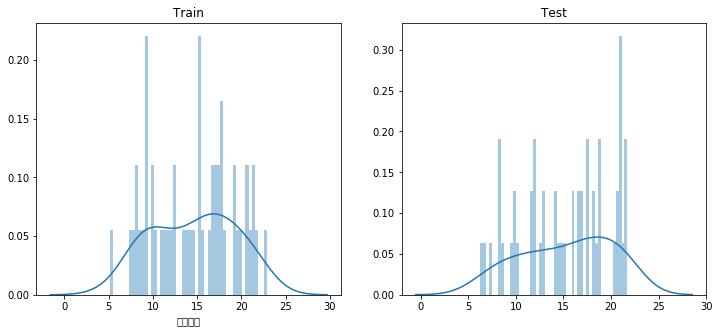

In [61]:
# 예측한 데이터를 시각화
# 연봉만 표준화시키고 팀은 카테고리화
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(Y_train, ax=ax1,bins=50)
ax1.set(title='Train')

sns.distplot(pre, ax=ax2,bins=50) # 로그시킨 Y_train_log을 다시 원위치 시켜준다.(np.exp)
ax2.set(title='Test')

In [63]:
X_test

,팀,승패,점수차,랭킹,salary
1,1,2,2,20,15.614
3,1,2,1,20,15.614
5,2,2,3,15,8.452
7,2,0,-2,15,8.452
9,3,2,1,5,8.277
11,3,1,0,5,8.277
13,4,0,-1,7,7.089
15,4,0,-2,7,7.089
17,5,0,-3,6,13.737
19,5,0,-6,6,13.737


In [67]:
pre

array([21.0409675 , 20.70067648, 11.85994646,  9.35658916, 11.73508225,
       10.18132925,  8.48550739,  8.15869006, 12.81364849, 12.49111252,
       20.51429068, 15.07331718, 15.89901705, 16.79582439, 18.27860174,
       18.27860174,  6.61228215,  6.25745588, 11.86231433,  9.67821889,
       14.33020457, 16.74204818, 18.85067089, 14.87349958, 18.34819648,
       15.9059406 , 21.71949006, 21.72114485, 21.12740805, 11.95495047,
       20.92088064, 20.92088064, 20.92088064, 20.92088064, 17.51540674,
       18.84373043, 17.63033729, 17.63033729, 18.72333072, 16.81105652,
       14.08672742, 14.08672742, 11.73462819, 12.85153579,  7.2635117 ,
        9.94305957,  8.1254492 ,  8.29773105, 16.68752202, 20.18615999,
       21.41949   ])

In [65]:
tempdf.head()

,팀,승패,점수차,랭킹,salary,점수합계
0,1,0,-1,20,15.614,17.658522
1,1,2,2,20,15.614,21.757135
2,1,2,1,20,15.614,20.757135
3,1,2,1,20,15.614,20.757135
4,1,2,1,20,15.614,20.757135


In [66]:
tot_ver2.head()

,경기날짜,팀,승패,점수차,랭킹,salary,점수합계
4,25.01. 22:00,대한민국,0,-1,20,15.614,17.658522
36,16.01. 22:30,대한민국,2,2,20,15.614,21.757135
60,07.01. 22:30,대한민국,2,1,20,15.614,20.757135
8,22.01. 22:00,대한민국,2,1,20,15.614,20.757135
84,12.01. 01:00,대한민국,2,1,20,15.614,20.757135
